In [ ]:
from hydra import initialize_config_dir, compose
from gaze_av_aloha.configs import Config
from omegaconf import OmegaConf
import gaze_av_aloha
from gaze_av_aloha.policies.gaze_policy.gaze_policy import GazePolicy
from gym_av_aloha.datasets.av_aloha_dataset import AVAlohaDataset, AVAlohaDatasetMeta
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Path to your config directory (adjust as needed)
config_dir = os.path.abspath("../configs")

overrides = [
    "policy=foveated_vit_policy",
    "policy.visualize=False",
]

with initialize_config_dir(config_dir=config_dir, job_name="my_app"):
    cfg: Config = compose(config_name="default", overrides=overrides)


/tmp/ipykernel_1628842/2156843835.py:19: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize_config_dir(config_dir=config_dir, job_name="my_app"):


In [3]:
dataset_meta = AVAlohaDatasetMeta(repo_id=cfg.task.dataset_repo_id, root=cfg.task.dataset_root)
policy = GazePolicy(cfg.policy, cfg.task, dataset_meta.stats)
policy.eval()

GazePolicy(
  (normalize_inputs): Normalize(
    (buffer_observation_images_zed_cam_left): ParameterDict(
        (mean): Parameter containing: [torch.FloatTensor of size 3x1x1]
        (std): Parameter containing: [torch.FloatTensor of size 3x1x1]
    )
    (buffer_action): ParameterDict(
        (max): Parameter containing: [torch.FloatTensor of size 21]
        (min): Parameter containing: [torch.FloatTensor of size 21]
    )
    (buffer_observation_state): ParameterDict(
        (max): Parameter containing: [torch.FloatTensor of size 21]
        (min): Parameter containing: [torch.FloatTensor of size 21]
    )
  )
  (unnormalize_outputs): Unnormalize(
    (buffer_action): ParameterDict(
        (max): Parameter containing: [torch.FloatTensor of size 21]
        (min): Parameter containing: [torch.FloatTensor of size 21]
    )
  )
  (flow): FlowModel(
    (backbone): FoveatedViT(
      (tokenizer): FoveatedImageTokenizer(
        (foveator): BatchedFoveator()
        (resize): Resiz

env_state: (14,), state: (21,)


In [ ]:

# import gym_av_aloha
# import gymnasium as gym
# env_kwargs = {
#     "disable_env_checker" : True,
#     "fps" : 8.333333333333,
#     "cameras" : {"zed_cam_left" : [480, 640]},
#     "render_camera" : "zed_cam_left" ,
#     "enable_av" : True,
#     "max_episode_steps" : 100,
# }

# viz_env = gym.make(
#     f"gym_av_aloha/thread-needle-v1",
#     **env_kwargs
# )
# obs, info = viz_env.reset(options={"distractors": True})

In [ ]:
# viz_env.unwrapped.set_state(state, env_state)
# obs, reward, terminated, truncated, info = viz_env.step(state)
# viz = obs["pixels"]["zed_cam_left"]



In [33]:

from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
import matplotlib.pyplot as plt

dataset = LeRobotDataset(
    repo_id="iantc104/av_aloha_sim_hook_package",
    episodes=[50,55,60],
)




Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

episode_000060.parquet:   0%|          | 0.00/126k [00:00<?, ?B/s]

episode_000050.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

episode_000055.parquet:   0%|          | 0.00/87.7k [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/731k [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/2.09M [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/1.92M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/2.17M [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

episode_000050.mp4:   0%|          | 0.00/2.16M [00:00<?, ?B/s]

episode_000055.mp4:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

episode_000060.mp4:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from gaze_av_aloha.policies.gaze_policy.tokenizer import BaseImageTokenizer, FoveatedImageTokenizer
import torch
import imageio
from tqdm import tqdm
import torchvision
import numpy as np

resize  = torchvision.transforms.Resize((288, 360))
resize1  = torchvision.transforms.Resize((288, 384))

video = []

for i in tqdm(range(len(dataset))):
    gaze = dataset[i]["left_eye"].unsqueeze(0)
    img = dataset[i]["observation.images.zed_cam_left"].unsqueeze(0)

    tokenizer = FoveatedImageTokenizer()
    tokens, _ = tokenizer.tokenize(img, gaze)
    blah = tokenizer.generate_visualization(tokens[0])
    fov = (blah.permute(1, 2, 0).numpy() * 255).astype('uint8')

    # tokenizer = FoveatedImageTokenizer()
    tokenizer = BaseImageTokenizer()
    tokens, _ = tokenizer.tokenize(img, gaze)
    blah = tokenizer.generate_visualization(tokens[0])
    fine = (blah.permute(1, 2, 0).numpy() * 255).astype('uint8')


    tokenizer = BaseImageTokenizer(
        token_size = 64,
        height = 256,
        width = 320,
    )
    tokens, _ = tokenizer.tokenize(img, gaze)
    blah = tokenizer.generate_visualization(tokens[0])
    blah = resize(blah.unsqueeze(0)).squeeze(0)
    coarse = (blah.permute(1, 2, 0).numpy() * 255).astype('uint8')

    img = resize(img)
    actual = (img[0].permute(1, 2, 0).numpy() * 255).astype('uint8')
    
    video.append(np.conca)
    break

imageio.mimwrite("video.mp4", video, fps=25)

  0%|          | 0/639 [00:00<?, ?it/s]

(288, 360, 3)


In [161]:
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
import matplotlib.pyplot as plt

dataset = LeRobotDataset(
    repo_id="iantc104/av_aloha_sim_cube_transfer",
    episodes=[51],
)


import gym_av_aloha
import gymnasium as gym
import numpy as np
env_kwargs = {
    "disable_env_checker" : True,
    "fps" : 8.333333333333,
    "cameras" : {"zed_cam_left" : [480, 640]},
    "render_camera" : "zed_cam_left" ,
    "enable_av" : True,
    "max_episode_steps" : 100,
}

viz_env = gym.make(
    f"gym_av_aloha/cube-transfer-v1",
    **env_kwargs
)
np.random.seed(0)
# obs, info = viz_env.reset(options={"distractors": True})
obs, info = viz_env.reset()




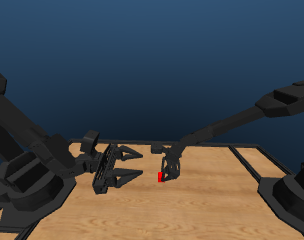

In [162]:
i = 40
state = dataset[i]["observation.state"]
env_state = dataset[i]["observation.environment_state"]

import matplotlib.pyplot as plt

viz_env.unwrapped.set_state(state, env_state)



from IPython.display import Image, display
plt.imsave("temp_image.png", viz_env.render())
display(Image(filename="temp_image.png"))